Categorical Variables: ['id', 'date', 'zipcode', 'waterfront', 'price_category']
Ordinal Variables: ['grade', 'condition', 'view']
Discrete Variables: ['bedrooms', 'floors', 'yr_built', 'yr_renovated', 'year']
Continuous Variables: ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']

Centrality and Distribution Measures:
                   count          mean           std           min  \
id              20234.0  4.604069e+09  2.875940e+09  1.000102e+06   
price           20234.0  4.974615e+05  2.483580e+05  7.500000e+04   
bedrooms        20234.0  3.330335e+00  8.925365e-01  0.000000e+00   
bathrooms       20234.0  2.079730e+00  7.009796e-01  0.000000e+00   
sqft_living     20234.0  2.006767e+03  7.826203e+02  2.900000e+02   
sqft_lot        20234.0  8.425362e+03  4.648317e+03  5.200000e+02   
floors          20234.0  1.484902e+00  5.402377e-01  1.000000e+00   
waterfront      20234.0  3.212415e-03  5.6

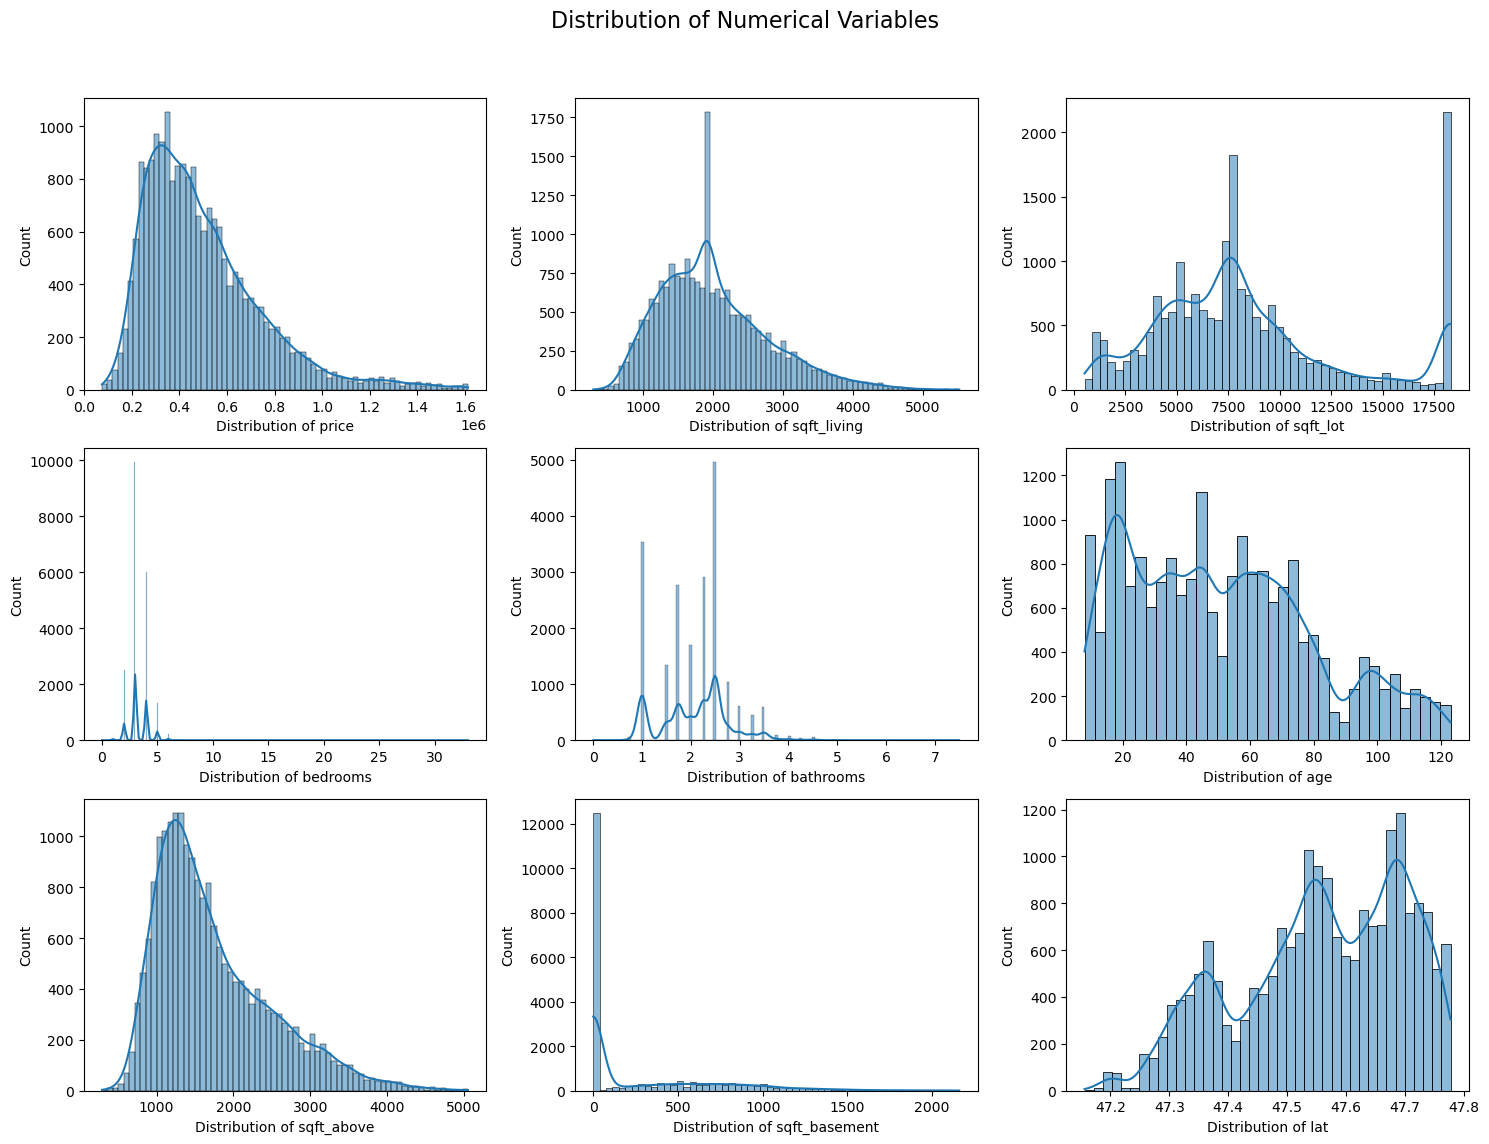

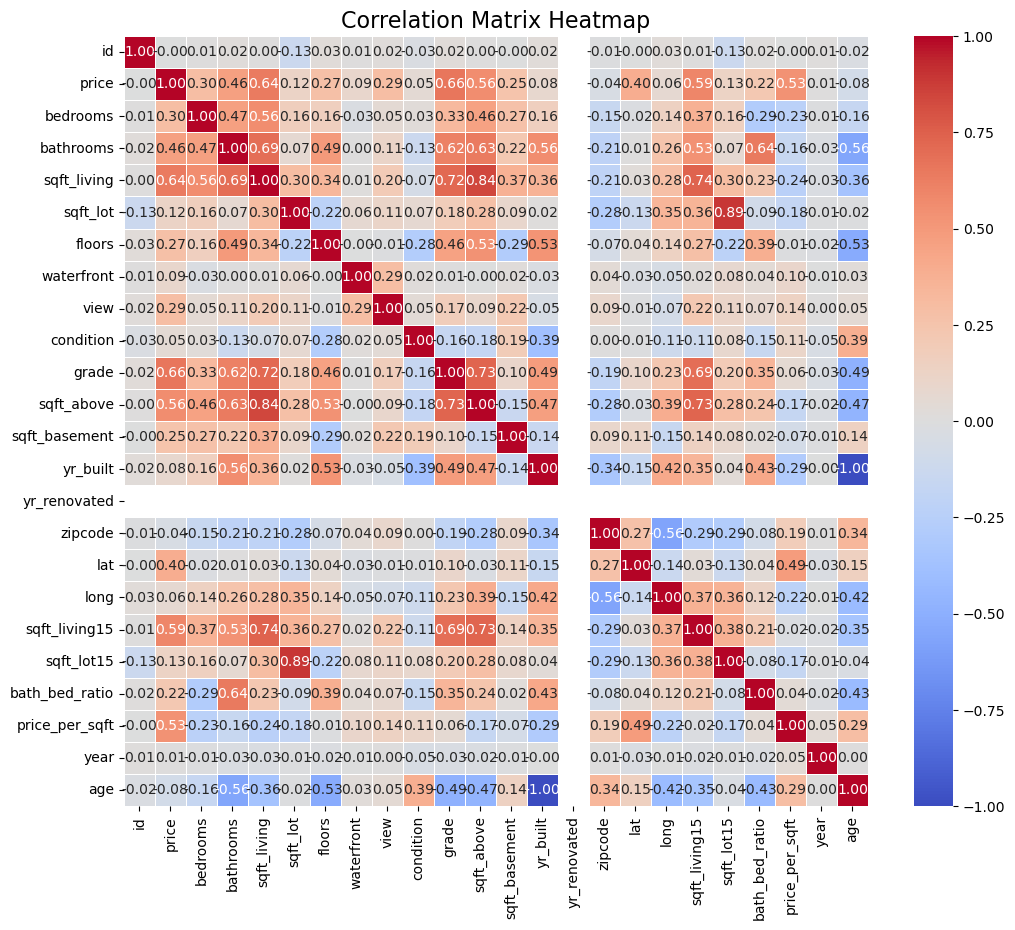

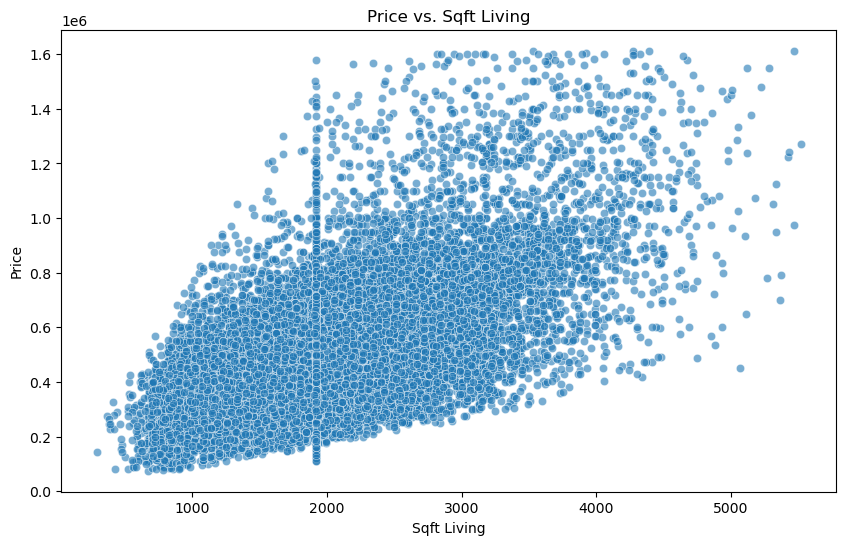

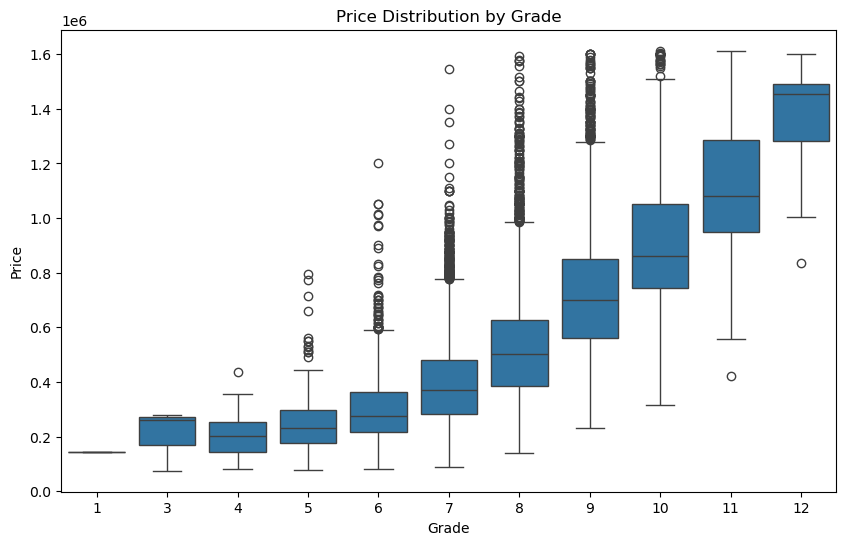

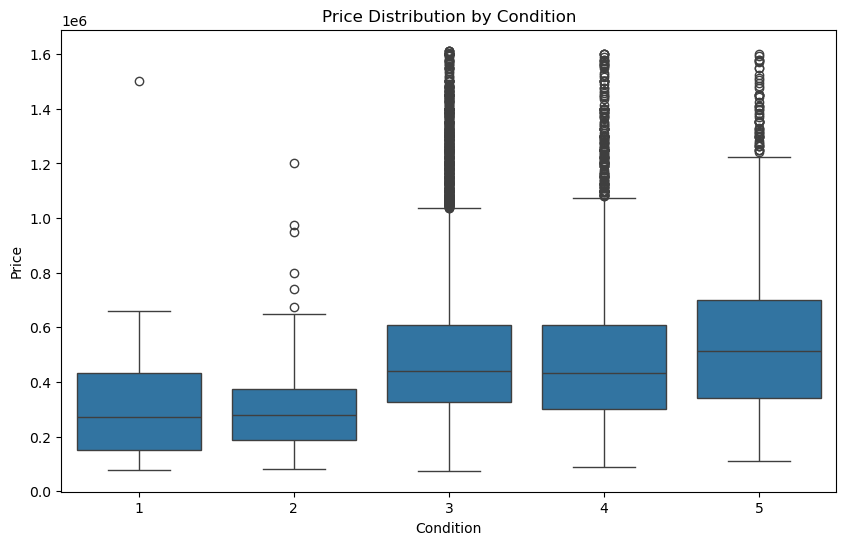

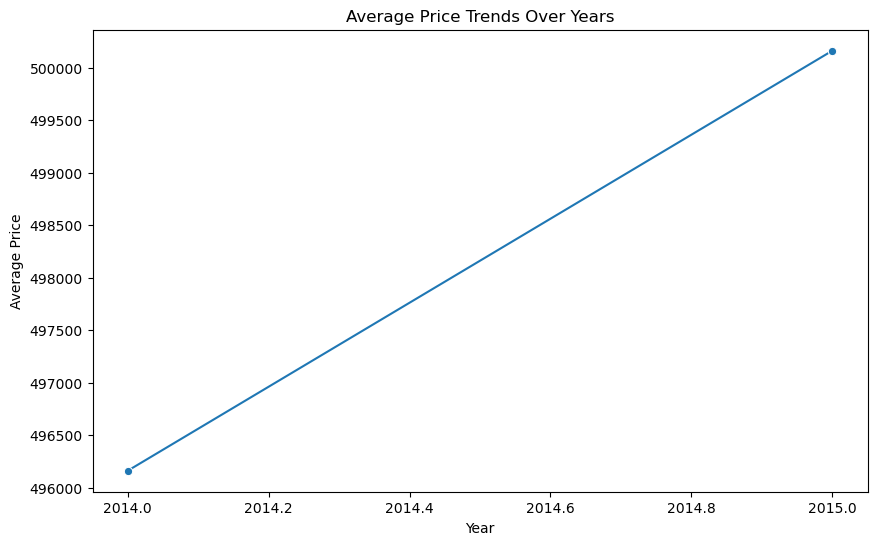

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\User\OneDrive\Desktop\New folder (2)\Dataset 2 (House Sales) (2)\transformed_house_sales2.csv'
house_sales_df = pd.read_csv(file_path)

# Add 'age' column if it doesn't exist, assuming 'yr_built' column exists
if 'yr_built' in house_sales_df.columns and 'age' not in house_sales_df.columns:
    house_sales_df['age'] = 2023 - house_sales_df['yr_built']  # Replace 2023 with the current year

# Identify variable types
categorical_vars = ['id', 'date', 'zipcode', 'waterfront', 'price_category']
ordinal_vars = ['grade', 'condition', 'view']
discrete_vars = ['bedrooms', 'floors', 'yr_built', 'yr_renovated', 'year']

# Check if the 'age' column exists in the DataFrame
if 'age' in house_sales_df.columns:
    continuous_vars = [
        'price', 'bathrooms', 'sqft_living', 'sqft_lot',
        'sqft_above', 'sqft_basement', 'lat', 'long',
        'sqft_living15', 'sqft_lot15', 'age'
    ]
else:
    continuous_vars = [
        'price', 'bathrooms', 'sqft_living', 'sqft_lot',
        'sqft_above', 'sqft_basement', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'
    ]

# Display variable types
print("Categorical Variables:", categorical_vars)
print("Ordinal Variables:", ordinal_vars)
print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)

# Measures of centrality and distribution
numerical_vars = house_sales_df.select_dtypes(include=['float64', 'int64']).columns
centrality_distribution = house_sales_df[numerical_vars].describe().T
centrality_distribution['variance'] = house_sales_df[numerical_vars].var()

print("\nCentrality and Distribution Measures:\n", centrality_distribution)

# Set up the matplotlib figure for distribution plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# List of numerical variables to plot
if 'age' in house_sales_df.columns:
    numerical_vars = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'age', 'sqft_above', 'sqft_basement', 'lat']
else:
    numerical_vars = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'lat']

# Plot histograms
for ax, var in zip(axes.flat, numerical_vars):
    sns.histplot(house_sales_df[var], kde=True, ax=ax)
    ax.set_xlabel(f'Distribution of {var}')
    ax.set_title('')  # Remove the title from the top

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Calculate the correlation matrix
correlation_matrix = house_sales_df.corr(numeric_only=True)

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

# Scatter plot of price vs. sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_sales_df, alpha=0.6)
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

# Boxplot of price by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=house_sales_df)
plt.title('Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

# Boxplot of price by condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=house_sales_df)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# Line plot of average price over years
average_price_by_year = house_sales_df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=average_price_by_year, marker='o')
plt.title('Average Price Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()
